# Homework 2 -- Option #1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   # import the required packages

In [2]:
building = pd.read_csv('building_inventory.csv')  # read the csv data as a dataframe
building 

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,In Use,0,1987,130,1,0,0,Storage,High Hazard,NaN
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1971,1971,49552,1,1,0,Education,Education,Not provided


## 1. Total square footage as a function of congressional district ("Congress Dist")

In [3]:
tsf_cd = building[['Congress Dist','Square Footage']]  # only choose the columns 'Congress Dist' and 'Square Footage'
tsf_cd = tsf_cd.groupby('Congress Dist').sum().reset_index() 
#  calculate the Total square footage for each congressional district

tsf_cd

,Congress Dist,Square Footage
0,0,793124
1,1,2351762
2,2,6285684
3,3,1293687
4,4,317741
5,5,1809022
6,6,145659
7,7,9211651
8,8,1461548
9,9,77978


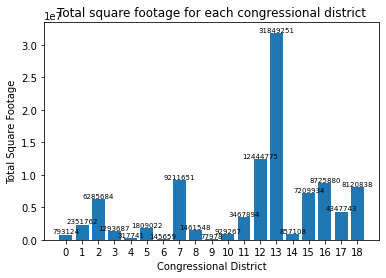

In [4]:
x = tsf_cd['Congress Dist'].tolist()   # convert the dataframe to list
y = tsf_cd['Square Footage'].tolist()  # convert the dataframe to list

plt.bar(range(len(y)), y,tick_label=x)  # plot a bar chart
plt.xlabel('Congressional District')    # add x-axis lable
plt.ylabel('Total Square Footage')      # add y-axis lable
plt.title('Total square footage for each congressional district')   # add title

for a,b in zip(x,y):
    plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)  # add number to each bar
# refer to https://zhuanlan.zhihu.com/p/23636308

plt.show()

* **Successes:** Using bar chart can easily compare the difference of total square footage between each two congressional districts. And we can easily notice the congressional districts with largest total square footage.
* **Shortcomings:** Since data have a huge variance, we can see that in this graph, some data is almost equal to 0. For example, the total square foot for Congressional District 6 is 145659, but we find that the bar is really short in the graph.

## 2. Average square footage per floor as a function of congressional district

In [5]:
atsf = building[['Congress Dist','Square Footage','Total Floors']]  # only choose the columns 'Congress Dist' and 'Square Footage'
atsf = atsf.groupby('Congress Dist').sum('Square Footage','Total Floors').reset_index() 
#  calculate the Total square footage and Total Floors for each congressional district

atsf

,Congress Dist,Square Footage,Total Floors
0,0,793124,216
1,1,2351762,134
2,2,6285684,647
3,3,1293687,72
4,4,317741,21
5,5,1809022,113
6,6,145659,28
7,7,9211651,517
8,8,1461548,312
9,9,77978,11


In [6]:
atsf['Average Square Footage'] = atsf['Square Footage']/atsf['Total Floors']    
# add a new column, and the Average Square Footage = total Square Footage /  Total Floors

atsf['Average Square Footage']=atsf['Average Square Footage'].round(decimals=2) # keep two decimals

atsf

,Congress Dist,Square Footage,Total Floors,Average Square Footage
0,0,793124,216,3671.87
1,1,2351762,134,17550.46
2,2,6285684,647,9715.12
3,3,1293687,72,17967.88
4,4,317741,21,15130.52
5,5,1809022,113,16009.04
6,6,145659,28,5202.11
7,7,9211651,517,17817.51
8,8,1461548,312,4684.45
9,9,77978,11,7088.91


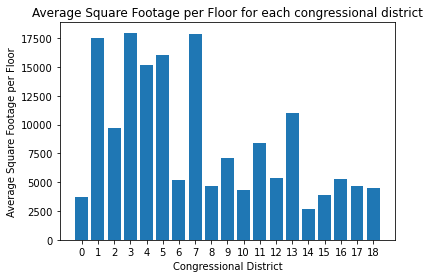

In [7]:
x_1 = atsf['Congress Dist'].tolist()   # convert the dataframe to list
y_1 = atsf['Average Square Footage'].tolist()  # convert the dataframe to list

plt.bar(range(len(y_1)), y_1,tick_label=x_1)        # plot a bar chart
plt.xlabel('Congressional District')                # add x-axis lable
plt.ylabel('Average Square Footage per Floor')      # add y-axis lable
plt.title('Average Square Footage per Floor for each congressional district')   # add a title

#for a,b in zip(x,y):
    #plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=7)  # add number to each bar
# refer to https://zhuanlan.zhihu.com/p/23636308

plt.show()

* **Successes:** Using bar chart can easily compare the difference of average square footage per floor between each two congressional districts. And we can know the rank of Average Square Footage per Floor among all the congressional districts.
* **Shortcomings:** No matter how I change the figure size, I cannot add the value number above each bar. It's difficult for reader to get exact number of the average square footage per floor for each congressional district.

# 第三题

In [8]:
building['Agency Name'].value_counts()  #calculate the total entries of each agency in the table

Department of Natural Resources              3223
Department of Corrections                    1428
Department of Transportation                 1137
Department of Human Services                  617
University of Illinois                        525
Southern Illinois University                  420
Historic Preservation Agency                  284
Department of Military Affairs                231
Department of Agriculture                     228
Department of Juvenile Justice                120
Department of State Police                    109
Illinois State University                     102
Department of Veterans' Affairs                94
Northern Illinois University                   79
Department of Central Management Services      60
Western Illinois University                    42
Office of the Secretary of State               41
Eastern Illinois University                    35
Northeastern Illinois University               18
Chicago State University                       16


In [9]:
#We know that the five most common departments are 'Department of Natural Resources', 'Department of Corrections',
#'Department of Transportation', 'Department of Human Services', and 'University of Illinois'. 
deparment = building.loc[building['Agency Name'].isin(['Department of Natural Resources','Department of Corrections',
                                                       'Department of Transportation','Department of Human Services',
                                                       'University of Illinois'])] #only choose required rows

In [10]:
deparment
# deparment['Agency Name'].value_counts() 

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,1975,1975,144,1,1,0,Unusual,Unusual,Not provided
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,In Use,2004,2004,144,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,Department of Transportation,Roscoe Maintenance Storage Facility,9988 N. 2nd Street,Roscoe,61073,Winnebago,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,1550,1,0,0,Storage,NaN,NaN
8856,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,1500,1,0,0,Storage,NaN,NaN
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,432,1,0,0,Storage,NaN,NaN
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,In Use,0,0,330,1,0,0,Storage,NaN,NaN


In [11]:
deparment = deparment.drop_duplicates()  # drop duplicate rows
# deparment

In [12]:
#'Department of Natural Resources'
nr = deparment.loc[deparment['Agency Name'].isin(['Department of Natural Resources'])]  
#create a dataframe only including rows of 'Department of Natural Resources'

# nr

In [13]:
nr_2 = nr[['Year Acquired','Square Footage']].groupby('Year Acquired').sum().reset_index() 
# choose required columns first, and then calculate the total Square Footage in each year

In [14]:
nr_2

,Year Acquired,Square Footage
0,0,86010
1,1840,760
2,1841,3256
3,1848,1644
4,1875,1428
...,...,...
98,2010,288
99,2011,912
100,2013,288
101,2014,90


In [15]:
# We should notice that '0' cannot be a year, we should drop the rows with 'Year Acquired' equal to 0
nr_3 = nr_2[1:]

In [16]:
nr_3

,Year Acquired,Square Footage
1,1840,760
2,1841,3256
3,1848,1644
4,1875,1428
5,1876,1200
...,...,...
98,2010,288
99,2011,912
100,2013,288
101,2014,90


In [17]:
x_nr = nr_3['Year Acquired'].tolist()     # convert the dataframe to a list
y_nr = nr_3['Square Footage'].tolist()    # convert the dataframe to a list

In [18]:
# Department of Corrections  
c = deparment.loc[deparment['Agency Name'].isin(['Department of Corrections'])]
#create a dataframe only including rows of 'Department of Natural Resources'

#c

In [19]:
c_2 = c[['Year Acquired','Square Footage']].groupby('Year Acquired').sum().reset_index()
# choose required columns first, and then calculate the total Square Footage in each year
c_2

,Year Acquired,Square Footage
0,0,16269
1,1858,7367
2,1860,20160
3,1863,15795
4,1865,143955
...,...,...
105,2005,47915
106,2006,48206
107,2007,24980
108,2009,64


In [20]:
# We should notice that '0' cannot be a year, we should drop the rows with 'Year Acquired' equal to 0
c_3 = c_2[1:]
# c_3

In [21]:
x_c = c_3['Year Acquired'].tolist()   # convert the dataframe to a list
y_c = c_3['Square Footage'].tolist()  # convert the dataframe to a list

In [22]:
#Department of Transportation
t = deparment.loc[deparment['Agency Name'].isin(['Department of Transportation'])]
#create a dataframe only including rows of 'Department of Natural Resources'

t_2 = t[['Year Acquired','Square Footage']].groupby('Year Acquired').sum().reset_index()
# choose required columns first, and then calculate the total Square Footage in each year
t_2

,Year Acquired,Square Footage
0,0,104688
1,1928,130
2,1931,388
3,1932,1000
4,1933,26410
...,...,...
81,2015,24302
82,2016,20371
83,2017,6720
84,2018,17160


In [23]:
# We should notice that '0' cannot be a year, we should drop the rows with 'Year Acquired' equal to 0
t_3 = t_2[1:]
#t_3

In [24]:
x_t = t_3['Year Acquired'].tolist()    # convert the dataframe to a list
y_t = t_3['Square Footage'].tolist()   # convert the dataframe to a list

In [25]:
#Department of Human Services 
hs = deparment.loc[deparment['Agency Name'].isin(['Department of Human Services'])]
#create a dataframe only including rows of 'Department of Natural Resources'

hs_2 = hs[['Year Acquired','Square Footage']].groupby('Year Acquired').sum().reset_index()
# choose required columns first, and then calculate the total Square Footage in each year
#hs_2

In [26]:
# We should notice that '0' cannot be a year, we should drop the rows with 'Year Acquired' equal to 0
hs_3 = hs_2[1:]
x_hs = hs_3['Year Acquired'].tolist()   # convert the dataframe to a list
y_hs = hs_3['Square Footage'].tolist()  # convert the dataframe to a list

In [27]:
#University of Illinois 
i = deparment.loc[deparment['Agency Name'].isin(['University of Illinois'])]
#create a dataframe only including rows of 'Department of Natural Resources'

i_2 = i[['Year Acquired','Square Footage']].groupby('Year Acquired').sum().reset_index()
# choose required columns first, and then calculate the total Square Footage in each year
i_2

,Year Acquired,Square Footage
0,0,2000
1,1857,3000
2,1870,2864
3,1878,33071
4,1888,28746
...,...,...
101,2006,180000
102,2008,144580
103,2010,35000
104,2013,230665


In [28]:
# We should notice that '0' cannot be a year, we should drop the rows with 'Year Acquired' equal to 0
i_3 = i_2[1:]
x_i = i_3['Year Acquired'].tolist()    # convert the dataframe to a list
y_i = i_3['Square Footage'].tolist()   # convert the dataframe to a list

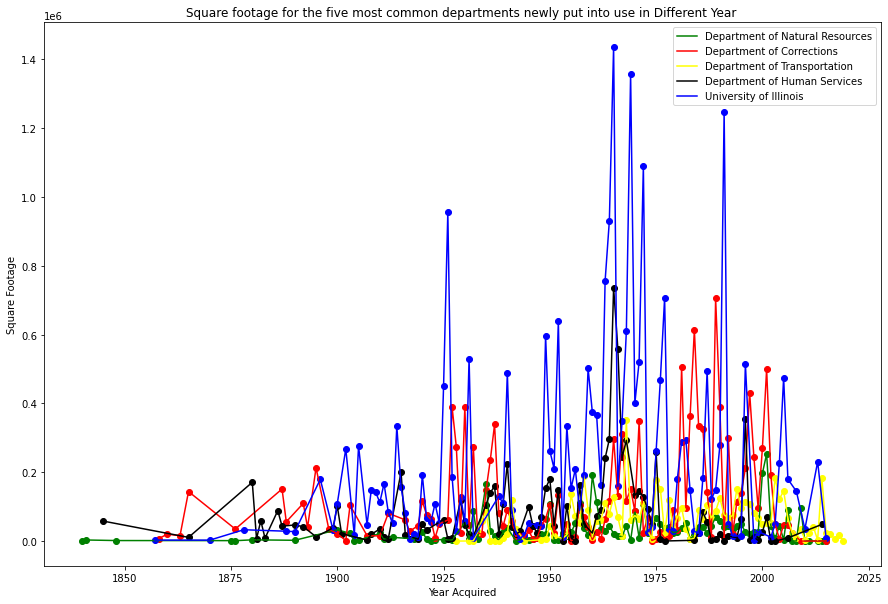

In [29]:
plt.figure(figsize=(15,10))

plt.scatter(x_nr,y_nr, color='green')   #draw the points of 'Department of Natural Resources'
plt.scatter(x_c,y_c, color='red')       #draw the points of 'Department of Corrections'
plt.scatter(x_t,y_t, color='yellow')    #draw the points of 'Department of Transportation'
plt.scatter(x_hs,y_hs, color='black')   #draw the points of 'Department of Human Services'
plt.scatter(x_i,y_i, color='blue')      #draw the points of 'University of Illinois'

plt.plot(x_nr, y_nr, color='green', label='Department of Natural Resources')  #draw the line of 'Department of Natural Resources'
plt.plot(x_c, y_c, color='red', label='Department of Corrections')            #draw the line of 'Department of Corrections'
plt.plot(x_t, y_t, color='yellow', label='Department of Transportation')      #draw the line of 'Department of Transportation'
plt.plot(x_hs, y_hs, color='black', label='Department of Human Services')     #draw the line of 'Department of Human Services'
plt.plot(x_i, y_i, color='blue', label='University of Illinois')              #draw the line of 'University of Illinois'

plt.title("Square footage for the five most common departments newly put into use in Different Year ")
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.legend()  #show legend

plt.show()

Here I choose to use 'Year Acquired' since I think the acquired year is the year people start using the building.
* **Successes:** Using this scatter diagram with lines connecting each two adjacent points, people can know the trend of square footage newly put into use for each department. And peopel can compare the difference of square footage newly put into use for the five most common departments in a specific year.
* **Shortcomings:** The points and lines are too much and some of them are clustered together. They look a little messy. It is difficult for people to get the exact number.